## Multiple Linear Regression

Multiple linear regression will predict the formula of linear line with specification of one response (y) and more than predictor (x1, x2, x3, x4, etc)

In [5]:
#import all package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [6]:
#load the file
df = pd.read_csv('multiple.csv')

In [7]:
df

,y,x1,x2,x3,x4
0,18,1,2,3,1
1,40,2,4,6,3
2,62,3,6,9,5
3,84,4,8,12,7
4,106,5,10,15,9
...,...,...,...,...,...
105,2328,106,212,318,211
106,2350,107,214,321,213
107,2372,108,216,324,215
108,2394,109,218,327,217


### Data definition above

The data above is not real data, but simulation data with formula y = x1 + 2x2 + 3x3 + 4x4. We will try to predict the closer formula of this model

### Exploratory Data Analysis

In [9]:
df.dtypes

y     int64
x1    int64
x2    int64
x3    int64
x4    int64
dtype: object

In [10]:
df.describe()

,y,x1,x2,x3,x4
count,110.000000,110.000000,110.000000,110.000000,110.000000
mean,1217.000000,55.500000,111.000000,166.500000,110.000000
std,701.762068,31.898276,63.796552,95.694827,63.796552
min,18.000000,1.000000,2.000000,3.000000,1.000000
25%,617.500000,28.250000,56.500000,84.750000,55.500000
50%,1217.000000,55.500000,111.000000,166.500000,110.000000
75%,1816.500000,82.750000,165.500000,248.250000,164.500000
max,2416.000000,110.000000,220.000000,330.000000,219.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       110 non-null    int64
 1   x1      110 non-null    int64
 2   x2      110 non-null    int64
 3   x3      110 non-null    int64
 4   x4      110 non-null    int64
dtypes: int64(5)
memory usage: 4.4 KB


From the data above, it is expected that no missing value and all the cell contains integer data type. So we can continue into next round and predict the regressor coeficient.

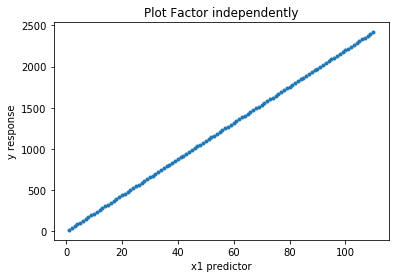

In [12]:
#Let say we want to see the correlation between predictor into the response independently

plt.plot(df['x1'], df['y'], marker='.', linestyle='none')
plt.xlabel('x1 predictor')
plt.ylabel('y response')
plt.title('Plot Factor independently')
plt.show()

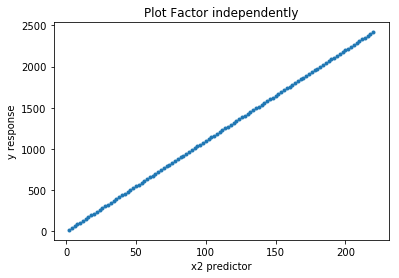

In [13]:
plt.plot(df['x2'], df['y'], marker='.', linestyle='none')
plt.xlabel('x2 predictor')
plt.ylabel('y response')
plt.title('Plot Factor independently')
plt.show()

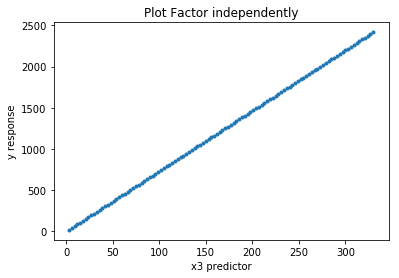

In [14]:
plt.plot(df['x3'], df['y'], marker='.', linestyle='none')
plt.xlabel('x3 predictor')
plt.ylabel('y response')
plt.title('Plot Factor independently')
plt.show()

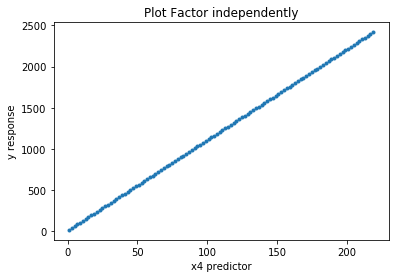

In [15]:
plt.plot(df['x4'], df['y'], marker='.', linestyle='none')
plt.xlabel('x4 predictor')
plt.ylabel('y response')
plt.title('Plot Factor independently')
plt.show()

### First attempt : separation of the data

In [21]:
#separate into predictor and response
X = pd.DataFrame(df.iloc[:, 1:])
y = pd.DataFrame(df.iloc[:, 0])

In [22]:
X.head(5)

,x1,x2,x3,x4
0,1,2,3,1
1,2,4,6,3
2,3,6,9,5
3,4,8,12,7
4,5,10,15,9


In [23]:
y.head(5)

,y
0,18
1,40
2,62
3,84
4,106


In [35]:
#splitting the file and train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [36]:
y_test

,y
85,1888
10,238
75,1668
2,62
24,546
101,2240
109,2416
7,172
16,370
91,2020


In [26]:
print('X Train size : ', X_train.shape)
print('X Test size : ', X_test.shape)
print('y Train size : ', y_train.shape)
print('y Test size : ', y_test.shape)

X Train size :  (88, 4)
X Test size :  (22, 4)
y Train size :  (88, 1)
y Test size :  (22, 1)


In [27]:
#modelling using regressor
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
a = pd.DataFrame(regressor.coef_, index=['Coefficient']).transpose()
b = pd.DataFrame(X.columns, columns=['Attribute'])
data = pd.concat([b,a], axis=1, join='inner')
data

,Attribute,Coefficient
0,x1,1.222222
1,x2,2.444444
2,x3,3.666667
3,x4,2.444444


In [30]:
#predict the result
y_predict = regressor.predict(X_test)
y_predict = pd.DataFrame(y_predict, columns=['Prediction'])
y_predict

,Prediction
0,1888.0
1,238.0
2,1668.0
3,62.0
4,546.0
5,2240.0
6,2416.0
7,172.0
8,370.0
9,2020.0


In [50]:
y_test_copy = y_test.reset_index(drop=True)
y_test_copy

,y
0,1888
1,238
2,1668
3,62
4,546
5,2240
6,2416
7,172
8,370
9,2020


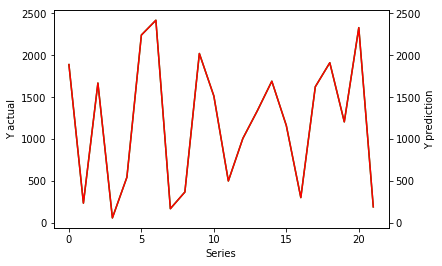

In [54]:
#comparison

fig, graph = plt.subplots()
graph.plot(y_test_copy, color='green')
graph.set_xlabel('Series')
graph.set_ylabel('Y actual')

graph2 = graph.twinx()
graph2.plot(y_predict, color='red')
graph2.set_ylabel('Y prediction')

plt.show()

we can see that between the real and prediction are very close

## Evaluation Metrics

In [46]:
print('Evaluation multiple linear gression')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Evaluation polynomial with degree 3
Mean Absolute Error: 2.538575410488358e-13
Mean Squared Error: 1.0109352900886112e-25
Root Mean Squared Error: 3.1795208602690615e-13


**Based on the evaluation metrics we can see that error is too small. So, we can conclude that the model is correct and nea